In [7]:
# --- IMPORTS

import numpy as np
import random
import matplotlib.pyplot as plt
import time

In [8]:
# --- CONSTANTS

NUM_TRIALS = 10000

In [9]:
# --- CLASSES

In [10]:
# --- FUNCTIONS

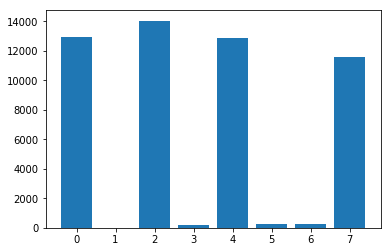

Time:  0.5338108539581299


In [14]:
# --- RUNTIME

start = time.time()

w_12 = -1
w_13 = 2
w_21 = -1
w_23 = 2
w_31 = 2
w_32 = 2
b_1 = 1
b_2 = 1
b_3 = -2

W = np.array([[0, w_12, w_13], [w_21, 0, w_23], [w_31, w_32, 0]])
b = np.array([b_1, b_2, b_3])
s = [random.choice([-1, 1]) for i in range(3)]

base_lambda = 1/3

result = np.zeros(8)

lambdas = [base_lambda, base_lambda, base_lambda]

for k in range(NUM_TRIALS):
        
    # competing exponentials
    cdf1 = np.random.uniform(0,1)
    t1 = -np.log(1-cdf1)/lambdas[0]
    cdf2 = np.random.uniform(0,1)
    t2 = -np.log(1-cdf2)/lambdas[1]
    cdf3 = np.random.uniform(0,1)
    t3 = -np.log(1-cdf3)/lambdas[2]
    
    # update the s[i] of the exponential that hit first
    if min(t1, min(t2, t3)) == t1:
        binary = [0 if i == -1 else 1 for i in s]
        result[4 * binary[0] + 2 * binary[1] + 1 * binary[2]] += t1
        s[0] = -s[0]
    elif min(t1, min(t2, t3)) == t2:
        binary = [0 if i == -1 else 1 for i in s]
        result[4 * binary[0] + 2 * binary[1] + 1 * binary[2]] += t2
        s[1] = -s[1]
    else:
        binary = [0 if i == -1 else 1 for i in s]
        result[4 * binary[0] + 2 * binary[1] + 1 * binary[2]] += t3
        s[2] = -s[2]

    # update summation, sigmoid, and lambdas
    for i in range(3):
        # summation = 0
        # for j in range(3):
        #     summation = summation + W[i][j] * s[j]
        summation = np.dot(W[i], s)
        sigmoid = (np.tanh(summation + b[i]) + 1) * 0.5
        if s[i] == 1:
            lambdas[i] = (1-sigmoid)*base_lambda
        else:
            lambdas[i] = sigmoid*base_lambda
    # print(lambdas)
    
plt.bar(np.arange(0, 8), result)
plt.show()

end = time.time()
time_taken = end - start
print('Time: ',time_taken)

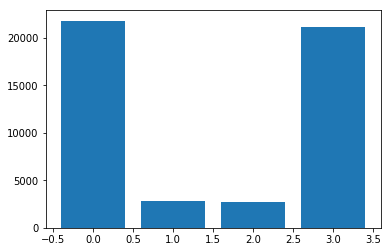

In [12]:
# W = np.array([[0, w_12, w_13], [w_21, 0, w_23], [w_31, w_32, 0]])
# b = np.array([b_1, b_2, b_3])

W = np.array([[0, 1], [1, 0]])
b = np.array([0, 0])
s = [random.choice([-1, 1]) for i in range(2)]

base_lambda = 1/2

result = np.zeros(4)

lambdas = [base_lambda, base_lambda]

for k in range(NUM_TRIALS):
        
    # competing exponentials
    cdf1 = np.random.uniform(0,1)
    t1 = -np.log(1-cdf1)/lambdas[0]
    cdf2 = np.random.uniform(0,1)
    t2 = -np.log(1-cdf2)/lambdas[1]
    
    # update the s[i] of the exponential that hit first
    if min(t1, t2) == t1:
        binary = [0 if i == -1 else 1 for i in s]
        result[2 * binary[0] + 1 * binary[1]] += t1 
        s[0] = -s[0]
    else:
        binary = [0 if i == -1 else 1 for i in s]
        result[2 * binary[0] + 1 * binary[1]] += t2
        s[1] = -s[1]

    # update summation, sigmoid, and lambdas
    for i in range(2):
        summation = 0
        for j in range(2):
            summation = summation + W[i][j] * s[j]
        sigmoid = (np.tanh(summation + b[i]) + 1) * 0.5
        if s[i] == 1:
            lambdas[i] = (1-sigmoid)*base_lambda
        else:
            lambdas[i] = sigmoid*base_lambda
    
plt.bar(np.arange(0, 4), result)
plt.show()